<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**:Mohammad Amin Eghlimi

**Student ID**:99101173

# Effect of Overfitting

In this exercise, we want to examine the effect of **overfitting**. As you learned in class, using too many features in training can result in a model with very low loss on the training set but high loss on the validation and test set. For this purpose, we have prepared a dataset in the `q2-train.npy`, `q2-valid.npy`, and `q2-test.npy` files for you. We know that `y` is a polynomial function of `x` in this dataset, meaning that 

$$
y = \sum_{i=0}^{k}a_ix^i
$$

However, we do not know the exact value of `k`.

## Importing Libraries

First, we import the necessary libraries for this assignment. Please note that you should only use these libraries and no other libraries are acceptable.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Reading Data and Preprocessing

In this part of the assignment, you should read data from the `.npy` files. The data in `q2-train.npy` file is your training set and should be stored in the `X_train` and `Y_train` variables. Similarly, the data in `q2-valid.npy` file is your validation set, and the data in `q2-test.npy` file is your test set, which should be stored in `X_val`, `Y_val`, `X_test`, and `Y_test` respectively. You can use the `np.load` function to read the `.npy` files.

In [2]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###
X_train = np.load('q2-train.npy')[:,0].reshape(-1, 1)
Y_train = np.load('q2-train.npy')[:,1].reshape(-1, 1)

X_test = np.load('q2-test.npy')[:,0].reshape(-1, 1)
Y_test = np.load('q2-test.npy')[:,1].reshape(-1, 1)

X_val = np.load('q2-valid.npy')[:,0].reshape(-1, 1)
Y_val = np.load('q2-valid.npy')[:,1].reshape(-1, 1)
### END CODE HERE ###

To find the best value of `k`, we want to change `k` from 1 to 12 and examine its effect on the validation set, and then choose the right value of `k`. For this purpose, we need to create a matrix with columns equal to $x^0$, $x^1$, $x^2$, ..., $x^k$ for every value of `k`. You can complete the following function to do this job. The function takes an $m \times 1$ vector `X` containing values of input `x` and returns an $m \times (k+1)$ matrix that has the properties mentioned above.

In [3]:
def create_matrix(X, k):
    
    '''
    X: an m by 1 array 
    '''
    new_X = None
    ### START CODE HERE ###

    new_X = np.column_stack([X**i for i in range(k+1)])
    ### END CODE HERE ###
    
    return new_X

## Validate Model

Now, we want to train our model for every value of `k`. You can use any of the methods that we used in **Question 1** (gradient descent or direct calculation) for this purpose. The following function trains our model on the training set for a given value of `k`, and then returns the loss on the training set and validation set, as well as the weight vector `w`.

In [4]:
# If you need any other function for training write it here
def loss(X, Y, w):
    '''
    X: an m by (n+1) matrix which includes inputs
    Y: an m by 1 vector which includes heating loads
    w: an (n+1) by 1 weight vector
    '''
    m, n = X.shape
    loss = None
    ### START CODE HERE ###
    loss = np.sum((np.matmul(X, w) - Y) ** 2) / m
    ### END CODE HERE ###
    return loss.item()

def direct_method(X, Y):
    '''
    X: an m by (n+1) matrix which includes inputs
    Y: an m by 1 vector which includes heating loads
    '''
    w = None
    ### START CODE HERE ###
    w = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, Y))
    ### END CODE HERE ###
    return w
# (like gradient descent or anything else)

In [5]:
def train(X_train, Y_train, X_val, Y_val, k):
    '''
    X_train: an m_train by 1 vector contains training points
    Y_train: an m_train by 1 vector contains training values
    X_val: an m_val by 1 vector contains validation points
    Y_val: an m_val by 1 vector contains validation values
    k: degree of polynomial
    '''
    w, loss_train, loss_val = None, None, None
    ### START CODE HERE ###
    X_train_matrix = create_matrix(X_train, k)
    X_val_matrix = create_matrix(X_val, k)
    w = direct_method(X_train_matrix, Y_train)
    loss_train = loss(X_train_matrix, Y_train, w)
    loss_val = loss(X_val_matrix, Y_val, w)
    ### END CODE HERE ###
    return w, loss_train, loss_val

In the cell below, you can change the value of `k` between 1 and 12 and plot the loss on the training and validation set as a function of `k` in the same plot.

**Question**: Discuss about the effect of $k$.

**Answer**:The degree of the polynomial, denoted by k, has a significant influence on the performance of polynomial regression models. By analyzing the losses on both the training and validation sets as a function of k, we can better understand the effect of k on the model's performance.

When k is small, such as k=1, the model may be too simplistic to capture the complexity of the relationship between the input variable x and the output variable y. As a result, the model will achieve high loss on both the training and validation sets, indicating underfitting. Underfitting occurs when the model is not able to generalize well to new data.

As k increases, the model becomes more flexible and better at capturing patterns in the training data. Therefore, the training loss decreases. However, if we increase k too much, the model will start to fit the noise and idiosyncrasies of the training set, leading to overfitting. Overfitting refers to a model that is too complex and specialized to fit the training data. Consequently, although the model performs very well on the training set, its performance will deteriorate on the validation set since the model fails to generalize well to new data.

The losses of both the training and validation sets over a range of k typically exhibit a U-shaped curve with a minimum validation loss. Initially, both the training and validation losses will decrease, as k increases, and then the validation loss will reach a minimum and start increasing. The optimal value of k is the one that minimizes the validation loss since it represents the best trade-off between underfitting and overfitting. We can identify the optimal value of k by analyzing the plot of losses as a function of k.

In conclusion, k is a hyperparameter that plays a crucial role in polynomial regression. A smaller k results in underfitting, while a larger k leads to overfitting. Therefore, selecting the optimal value of k is critical in balancing model complexity and generalization for the best performance.

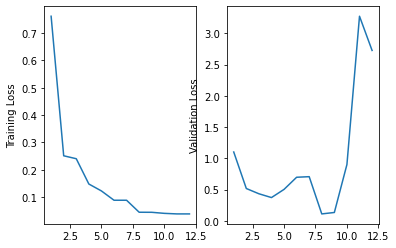

In [19]:
### START CODE HERE ###
import matplotlib.pyplot as plt
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

kv = range(1, 13)
loss_t = []
loss_v = []

for k in kv:
    w, loss_train, loss_val = train(X_train, Y_train, X_val, Y_val, k)
    loss_t.append(loss_train)
    loss_v.append(loss_val)
    
    
ax1.plot(kv, loss_t)
ax1.set_ylabel('Training Loss')

ax2.plot(kv , loss_v)
ax2.set_ylabel('Validation Loss')

plt.show()

### END CODE HERE ###

## Evaluating Model

In the cell below find the loss of your best model on the test set.

**Question**: Why we need test set?

**Answer**:importance of having a separate test set to evaluate the performance of machine learning models after training. It notes that without testing on a separate set of data, we cannot accurately measure how well a model generalizes to new data. Using the same data for both training and testing can lead to overfitting and unrealistic estimates of the model's performance.

In [23]:
### START CODE HERE ###
k_best = 8
w, train_loss, val_loss = train(X_train, Y_train, X_val, Y_val, k_best)
X_t_new = create_matrix(X_test, k_best)
t_loss = loss(X_t_new,Y_test,w)
print(t_loss)
### END CODE HERE ###

0.11791424797200493
